In [753]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math

In [754]:
import warnings
warnings.filterwarnings("ignore")

## Notes
Some Key Details
- Suburb: Suburb
- Address: Address
- Rooms: Number of rooms
- Price: Price in Australian dollars
- Method:
   - S - property sold;
   - SP - property sold prior;
   - PI - property passed in;
   - PN - sold prior not disclosed;
   - SN - sold not disclosed;
   - NB - no bid;
   - VB - vendor bid;
   - W - withdrawn prior to auction;
   - SA - sold after auction;
   - SS - sold after auction price not disclosed.
   - N/A - price or highest bid not available.
- Type:
   - br - bedroom(s);
   - h - house,cottage,villa, semi,terrace;
   - u - unit, duplex;
   - t - townhouse;
   - dev site - development site;
   - o res - other residential.
- SellerG: Real Estate Agent
- Date: Date sold
- Distance: Distance from CBD in Kilometres
- Regionname: General Region (West, North West, North, North east …etc)
- Propertycount: Number of properties that exist in the suburb.
- Bedroom2 : Scraped # of Bedrooms (from different source)
- Bathroom: Number of Bathrooms
- Car: Number of carspots
- Landsize: Land Size in Metres
- BuildingArea: Building Size in Metres
- YearBuilt: Year the house was built
- CouncilArea: Governing council for the area
- Lattitude: Self explanitory
- Longtitude: Self explanitory

In [755]:
df = pd.read_csv("datasets/melbourne_housing_market/melbourne_housing_market_full.csv")
backup_df = df.copy()

df.head().T

,0,1,2,3,4
Suburb,Abbotsford,Abbotsford,Abbotsford,Abbotsford,Abbotsford
Address,68 Studley St,85 Turner St,25 Bloomburg St,18/659 Victoria St,5 Charles St
Rooms,2,2,2,3,3
Type,h,h,h,u,h
Price,NaN,1.48e+06,1.035e+06,NaN,1.465e+06
Method,SS,S,S,VB,SP
SellerG,Jellis,Biggin,Biggin,Rounds,Biggin
Date,3/09/2016,3/12/2016,4/02/2016,4/02/2016,4/03/2017
Distance,2.5,2.5,2.5,2.5,2.5
Postcode,3067,3067,3067,3067,3067


In [756]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,34857,351,Reservoir,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,34857,34009,5 Charles St,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,34857,NaN,NaN,NaN,3.03101,0.969933,1,2,3,4,16
Type,34857,3,h,23980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,27247,NaN,NaN,NaN,1.05017e+06,641467,85000,635000,870000,1.295e+06,1.12e+07
Method,34857,9,S,19744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,34857,388,Jellis,3359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,34857,78,28/10/2017,1119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,34856,NaN,NaN,NaN,11.1849,6.78889,0,6.4,10.3,14,48.1
Postcode,34856,NaN,NaN,NaN,3116.06,109.024,3000,3051,3103,3156,3978


# Feature visualization

In [757]:
print(f"Total rows: {len(df)}")
print("-------")
print("Missing values")

def find_missing_values(df, column):
    print(f"{column.ljust(15, ' ')}: {df[column].isnull().sum()}")
    
for column in sorted(list(df.columns)):
    find_missing_values(df, column)

Total rows: 34857
-------
Missing values
Address        : 0
Bathroom       : 8226
Bedroom2       : 8217
BuildingArea   : 21115
Car            : 8728
CouncilArea    : 3
Date           : 0
Distance       : 1
Landsize       : 11810
Lattitude      : 7976
Longtitude     : 7976
Method         : 0
Postcode       : 1
Price          : 7610
Propertycount  : 3
Regionname     : 3
Rooms          : 0
SellerG        : 0
Suburb         : 0
Type           : 0
YearBuilt      : 19306


In [792]:
df = backup_df.copy()

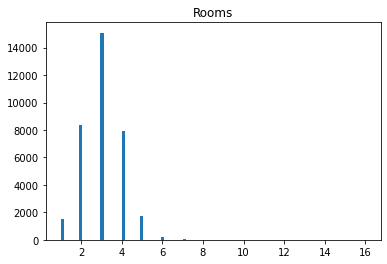

Total houses have more than 6 rooms: 65 (0.18647617408268066%)


In [759]:
plt.hist(df["Rooms"], 100)
plt.title("Rooms")
plt.show()

# There are a few houses having rooms greater than 5, which is likely contribute to the noise
room_limit = 6
total_house_above_limit = (df["Rooms"] > room_limit).sum()
print(f"Total houses have more than {room_limit} rooms: {total_house_above_limit} ({total_house_above_limit / len(df) * 100}%)")

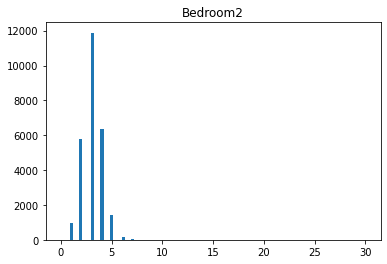

Total houses have more than 6 bedrooms: 56 (0.16065639613277105%)


In [760]:
plt.hist(df["Bedroom2"], 100)
plt.title("Bedroom2")
plt.show()

bedroom_limit = 6
total_house_above_limit = (df["Bedroom2"] > bedroom_limit).sum()
print(f"Total houses have more than {bedroom_limit} bedrooms: {total_house_above_limit} ({total_house_above_limit / len(df) * 100}%)")

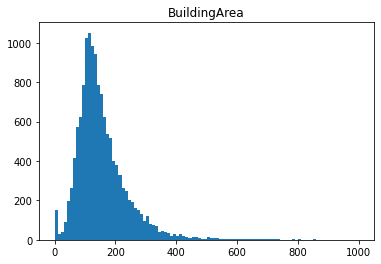

Total houses have building area more than 6m2: 13 (0.037295234816536134%)


In [761]:
plt.hist(df["BuildingArea"], 100, range=[0, 1000])
plt.title("BuildingArea")
plt.show()

building_area_limit = 1000
total_house_above_limit = (df["BuildingArea"] > building_area_limit).sum()
print(f"Total houses have building area more than {bedroom_limit}m2: {total_house_above_limit} ({total_house_above_limit / len(df) * 100}%)")

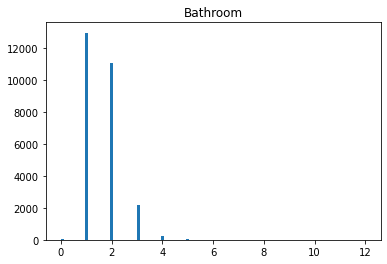

Total houses have more than 6 bathrooms: 9 (0.02581977794990963%)


In [762]:
plt.hist(df["Bathroom"], 100)
plt.title("Bathroom")
plt.show()

bathroom_limit = 6
total_house_above_limit = (df["Bathroom"] > bathroom_limit).sum()
print(f"Total houses have more than {bathroom_limit} bathrooms: {total_house_above_limit} ({total_house_above_limit / len(df) * 100}%)")

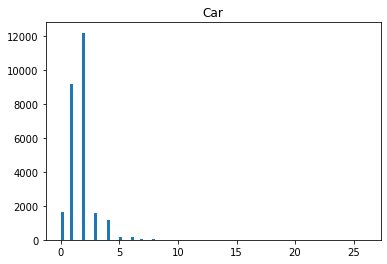

Total houses have more than 6 cars: 62 (0.1778695814327108%)


In [763]:
plt.hist(df["Car"], 100)
plt.title("Car")
plt.show()

car_limit = 6
total_house_above_limit = (df["Car"] > car_limit).sum()
print(f"Total houses have more than {car_limit} cars: {total_house_above_limit} ({total_house_above_limit / len(df) * 100}%)")

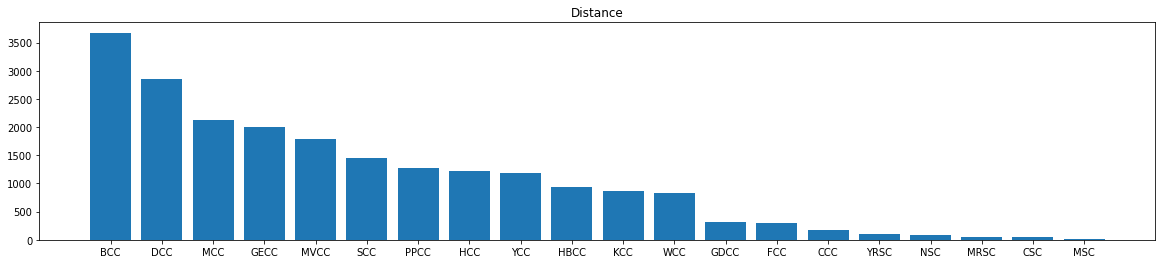

In [764]:
def get_shortcut_name(council_name):
    segments = council_name.split(" ")
    
    return "".join([segment[0] for segment in segments])

council_area = df["CouncilArea"].value_counts()
council_area_names = list(map(get_shortcut_name, list(council_area.index)))

fig, ax = plt.subplots(1, 1, figsize=(20, 4))
ax.bar(council_area_names, council_area.values);
ax.set_title("Distance")
plt.show()

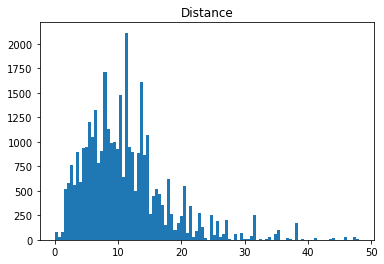

Total houses have distance more than 50km: 0 (0.0%)


In [765]:
plt.hist(df["Distance"], 100);
plt.title("Distance")
plt.show()

distance_limit = 50
total_house_above_limit = (df["Distance"] > distance_limit).sum()
print(f"Total houses have distance more than {distance_limit}km: {total_house_above_limit} ({total_house_above_limit / len(df) * 100}%)")

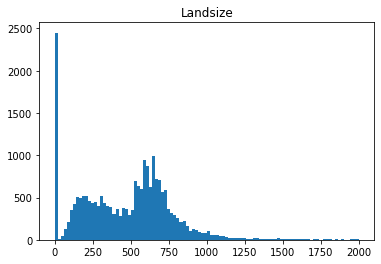

Total houses have landsize more than 2000m2: 361 (1.035659982213042%)


In [766]:
plt.hist(df["Landsize"], 100, range=[0, 2000]);
plt.title("Landsize")
plt.show()

landsize_limit = 2000
total_house_above_limit = (df["Landsize"] > landsize_limit).sum()
print(f"Total houses have landsize more than {landsize_limit}m2: {total_house_above_limit} ({total_house_above_limit / len(df) * 100}%)")
# We can also see that there are ~2500 houses having 0 landsize

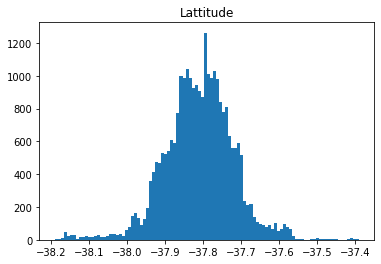

In [767]:
plt.hist(df["Lattitude"], 100);
plt.title("Lattitude")
plt.show()

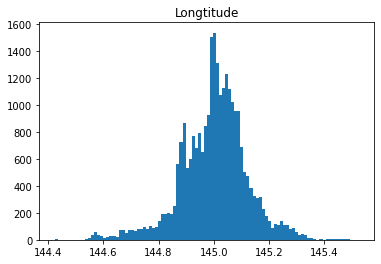

In [768]:
plt.hist(df["Longtitude"], 100);
plt.title("Longtitude")
plt.show()

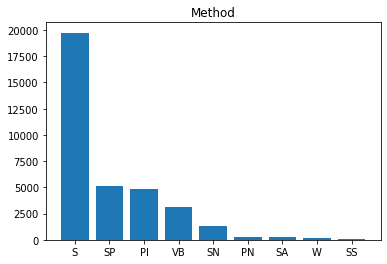

In [769]:
methods = df["Method"].value_counts()

plt.bar(methods.index, methods.values)
plt.title("Method")
plt.show()

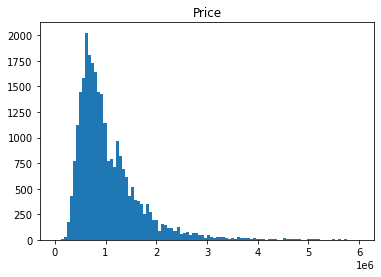

In [770]:
plt.hist(df["Price"], 100, range=[0, 0.6 * 1e7]);
plt.title("Price")
plt.show()

Total houses have distance more than 20000km: 844 (2.421321398858192%)


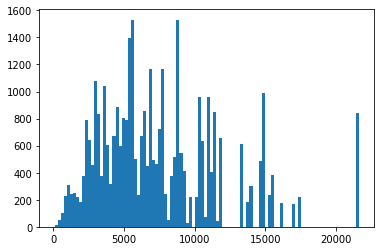

In [771]:
plt.hist(df["Propertycount"], 100);

propertycount_limit = 20000
total_house_above_limit = (df["Propertycount"] > propertycount_limit).sum()
print(f"Total houses have distance more than {propertycount_limit}km: {total_house_above_limit} ({total_house_above_limit / len(df) * 100}%)")

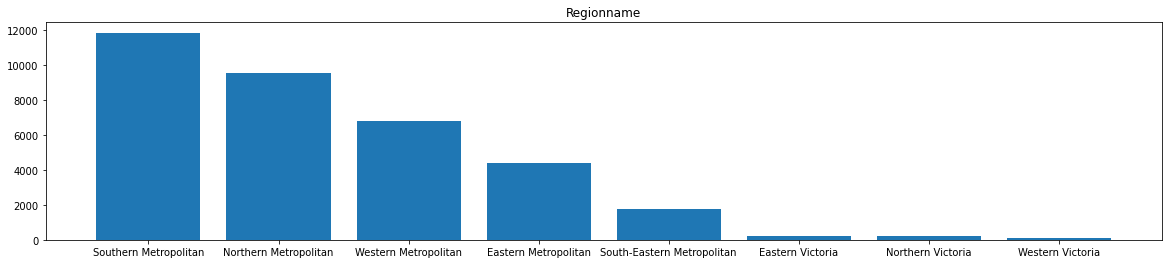

In [772]:
regions = df["Regionname"].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(20, 4))
plt.bar(regions.index, regions.values)
ax.set_title("Regionname")
plt.show()

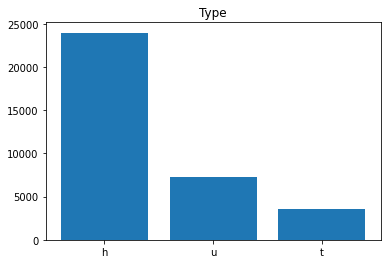

In [773]:
types = df["Type"].value_counts()

plt.bar(types.index, types.values)
plt.title("Type")
plt.show()

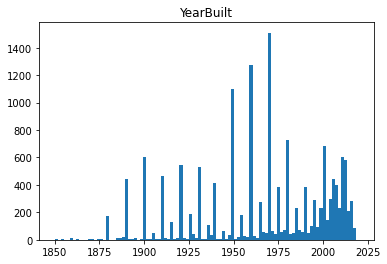

Total houses built not in the range of [1850, 2020]: 5 (0.014344321083283127%)


In [774]:
year_built_limit = [1850, 2020]

plt.hist(df["YearBuilt"], 100, range=year_built_limit);
plt.title("YearBuilt")
plt.show()

house_not_in_built_limit = df[(df["YearBuilt"] < year_built_limit[0]) | (df["YearBuilt"] > year_built_limit[1])]
total_house_above_limit = len(house_not_in_built_limit)
print(f"Total houses built not in the range of {year_built_limit}: {total_house_above_limit} ({total_house_above_limit / len(df) * 100}%)")

# Interaction among features

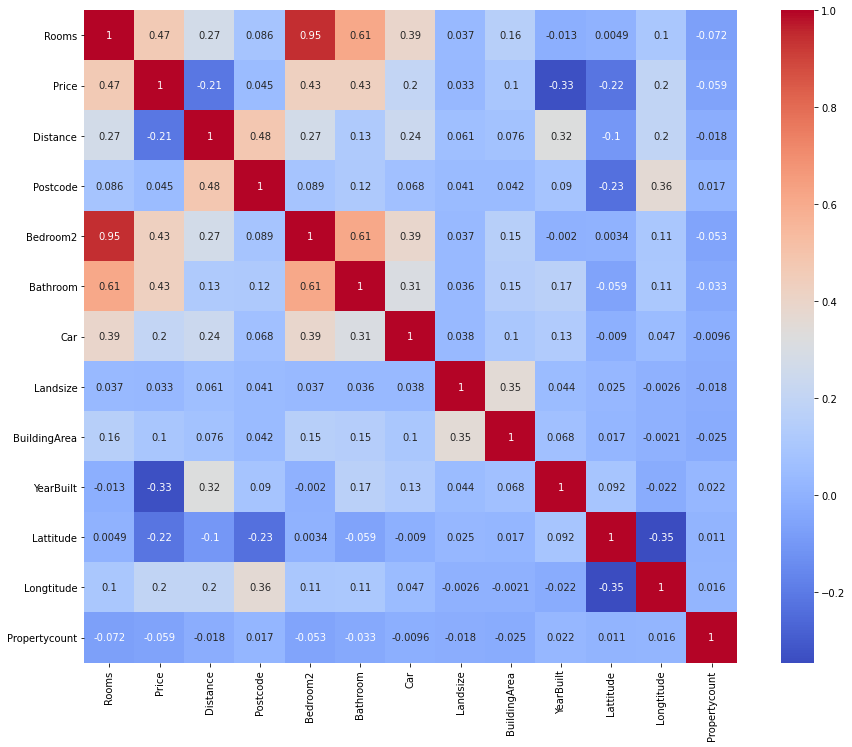

In [775]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, square=True, cmap="coolwarm", ax=ax);

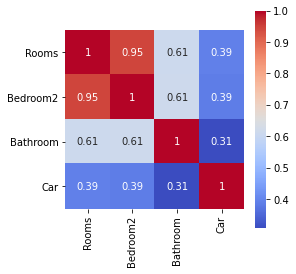

In [776]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.heatmap(df[["Rooms", "Bedroom2", "Bathroom", "Car"]].corr(), annot=True, square=True, cmap="coolwarm", ax=ax);

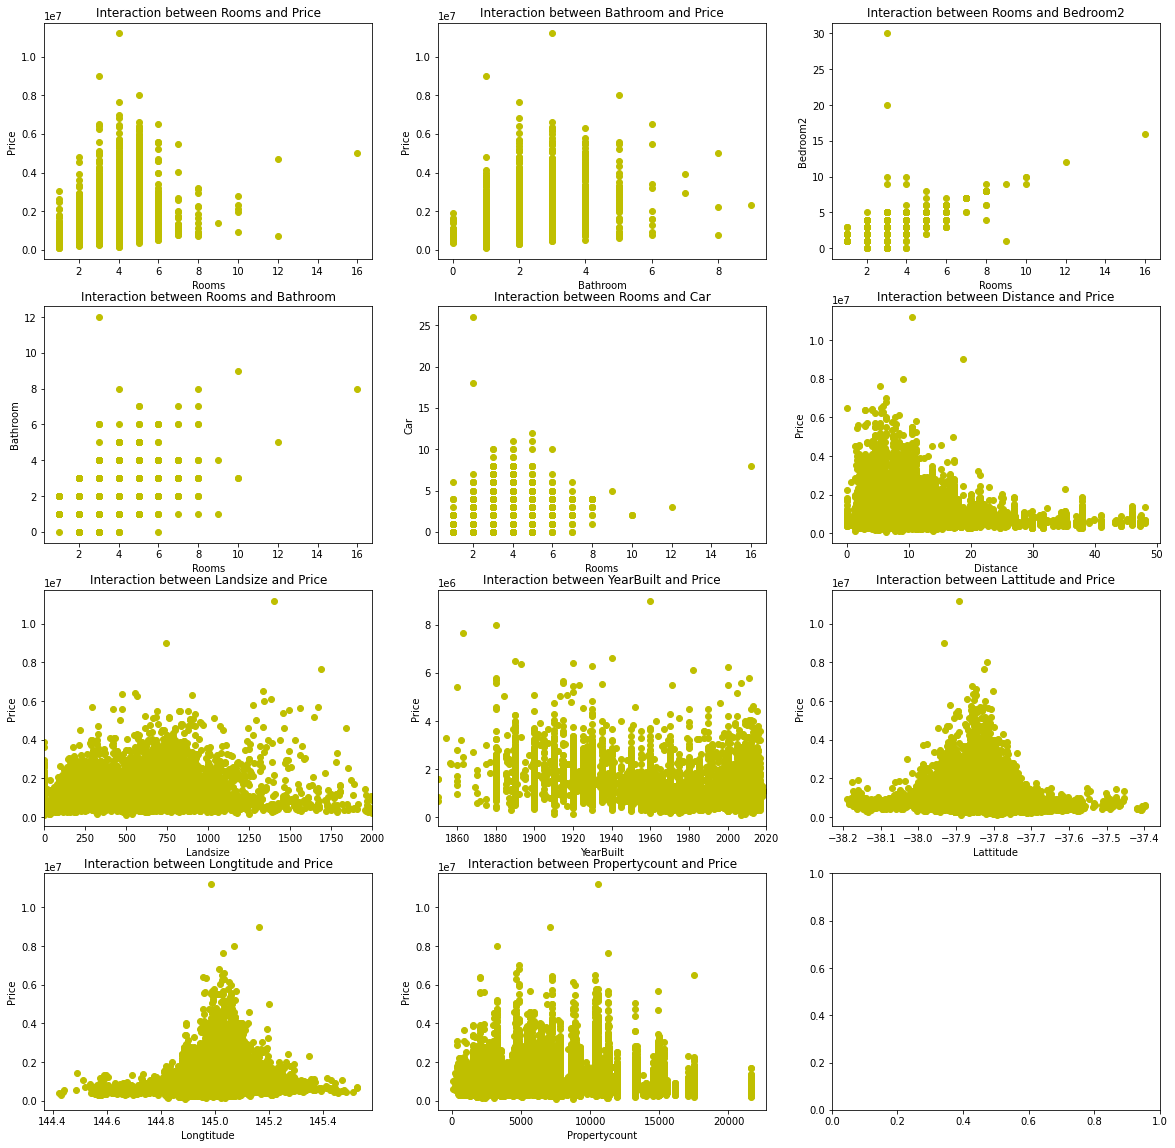

In [793]:
column_pairs = [
    ["Rooms", "Price", None],
    ["Bathroom", "Price", None],
    ["Rooms", "Bedroom2", None],
    ["Rooms", "Bathroom", None],
    ["Rooms", "Car", None],
    ["Distance", "Price", None],
    ["Landsize", "Price", {"xlim": [0, landsize_limit]}],
    ["YearBuilt", "Price", {"xlim": year_built_limit}],
    ["Lattitude", "Price", None],
    ["Longtitude", "Price", None],
    ["Propertycount", "Price", None],
]
fig, ax = plt.subplots(math.ceil(len(column_pairs) / 3), 3, figsize=(20, 20))
i, j = 0, 0

for column1, column2, option in column_pairs:
    ax[i][j].plot(df[column1], df[column2], "yo")
    ax[i][j].set_title(f"Interaction between {column1} and {column2}")
    ax[i][j].set_xlabel(column1)
    ax[i][j].set_ylabel(column2)
    
    if option and "xlim" in option:
        ax[i][j].set_xlim(option["xlim"])
    
    j += 1
    
    if j == 3:
        j = 0
        i += 1
    
plt.show()

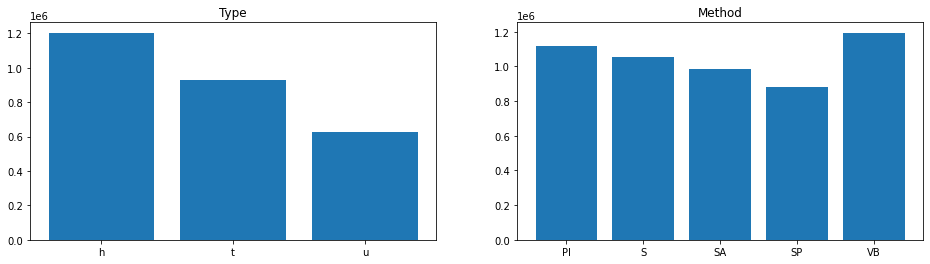

In [803]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

price_per_type = df[df["Price"] > 0].groupby("Type")["Price"].mean()
ax[0].bar(price_per_type.index, price_per_type.values)
ax[0].set_title("Type")

price_per_method = df[df["Price"] > 0].groupby("Method")["Price"].mean()
ax[1].bar(price_per_method.index, price_per_method.values)
ax[1].set_title("Method")

plt.show()

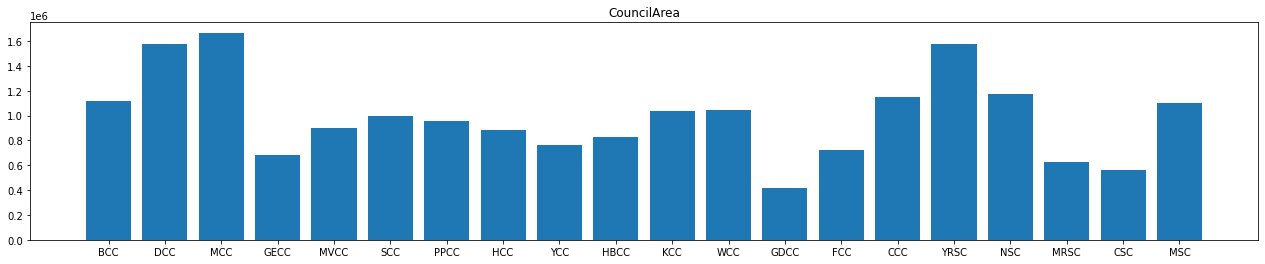

In [804]:
fig, ax = plt.subplots(1, 1, figsize=(22, 4))
price_per_councilarea = df[df["Price"] > 0].groupby("CouncilArea")["Price"].mean()

ax.bar(council_area_names, price_per_councilarea.values)
ax.set_title("CouncilArea")
plt.show()

# There are the remarkable differences in price between C

- There are an increasing trend in the third graph. So it's clear that the higher the rooms, the higher the bedroom
- As we can see in the __Interaction between Distance and Price__ (Sixth graph), the farther the distance from Central District Business (CBD), the lower the cost
- The trends between __Landsize and Price__, __YearBuilt and Price__, __Propertycount and Price__ aren't clear
- The closer to the central, the higher the price (nineth and tenth graphs)
- The mean price of __(h - house,cottage,villa, semi,terrace)__ is significantly higher than __(u - unit, duplex)__ and __(t - townhouse)__
- 

- __Suburb__         : 0
- __Address__        : 0
- __Rooms__          : 0
- __Type__           : 0
- __Price__          : 7610  --> Drop rows
- __Method__         : 0
- __SellerG__        : 0
- __Date__           : 0
- __Distance__       : 1     --> Avarage **(Apply more technique to average)**
- __Postcode__       : 1     --> Drop column
- __Bedroom2__       : 8217  --> Drop column
- __Bathroom__       : 8226  --> Average
- __Car__            : 8728  --> Average
- __Landsize__       : 11810 --> Average
- __BuildingArea__   : 21115 --> Drop column (missing too many values + correlated with landsize)
- __YearBuilt__      : 19306 --> Average
- __CouncilArea__    : 3     --> Drop rows
- __Lattitude__      : 7976  --> Average (still contribute to the performance of the model)
- __Longtitude__     : 7976  --> Average (still contribute to the performance of the model)
- __Regionname__     : 3     --> Drop rows
- __Propertycount__  : 3     --> Drop rows

### Analysis
- __Bathroom__: should not be dropped because it doesn't count in rooms, it's just based on the trend of having more rooms equals having more bathroom
- __Missing properties__: For missing properties, we can fill nan by houses having roughly the same properties (suburb + roguhly same rooms)

In [778]:
# Divide the brokers into multiple range
# VIP
# Moderate
# Amateur

# Show correlations and evaluate
# Delve into particular problems

# Feature selection & Feature engineering

In [779]:
# backup the dataframe for the next tries
df = backup_df.copy()
group_suburb_rooms = df.groupby(["Type", "Suburb", "Rooms"])
now = datetime.datetime.now()

# filter noise
df = df[(df["Landsize"] > 0) & (df["Landsize"] <= landsize_limit) | (df["Landsize"].isnull())]
df = df[(df["Distance"] <= distance_limit) | (df["Distance"].isnull())]
df = df[df["Rooms"] <= room_limit]
df = df[(df["Bedroom2"] <= bedroom_limit) | (df["Bedroom2"].isnull())]  # hurt the training score if not filter noise
df = df[(df["Bathroom"] <= bathroom_limit) | (df["Bathroom"].isnull())]
df = df[(df["Car"] <= car_limit) | (df["Car"].isnull())]
df = df[df["Propertycount"] <= propertycount_limit]
df = df[((df["YearBuilt"] >= year_built_limit[0]) & (df["YearBuilt"] <= year_built_limit[1])) | (df["YearBuilt"].isnull())]

# feature engineering
df["Roadname"] = df["Address"].apply(lambda r: " ".join(r.split(" ")[1:]).lower())
# df["YearOld"] = now.year - df["YearBuilt"]

fill_nan_by_suburb_and_room_columns = [
    "Landsize",
    "Distance",
    "Bathroom",
    "Car",
    "YearBuilt",
    "Lattitude",
    "Longtitude",
]

for column in fill_nan_by_suburb_and_room_columns:
    for i, row in df[df[column].isnull()].iterrows():
        # mean value of suburb, type, and rooms
        mean = group_suburb_rooms.get_group((row["Type"], row["Suburb"], row["Rooms"]))[column].mean()

        if mean == 0 or math.isnan(mean):
            # mean value of suburb, type, and roughly the same rooms
            mean = df[(df["Type"] == row["Type"]) & (df["Suburb"] == row["Suburb"]) & (df["Rooms"] >= row["Rooms"] - 1) & (df["Rooms"] <= row["Rooms"] + 1)][column].mean()
            
            if mean == 0 or math.isnan(mean):
                # mean value of suburb and type
                mean = df[(df["Type"] == row["Type"]) & (df["Suburb"] == row["Suburb"])][column].mean()
                
                if mean == 0 or math.isnan(mean):
                    # mean value of suburb only
                    mean = df[df["Suburb"] == row["Suburb"]][column].mean()
                    
                    if mean == 0 or math.isnan(mean):
                        # mean value of overall dataset
                        mean = df[column].mean()
        
        df.at[i, column] = int(mean)
    
# drop columns
dropped_columns = [
    "BuildingArea", # has a lot of missing values and correlated to landsize
#     "Lattitude",
#     "Longtitude",
    "Address",
    "Date",
    "SellerG", # for experiment
    "Date",
    "Bedroom2",
    "Suburb", # has a lot of unique values
    "Roadname",
    "Postcode",
]
df = df.drop(dropped_columns, axis=1)

# filter nan
filter_nan_columns = [
    "Regionname",
    "Propertycount",
    "Price",
]
for column in filter_nan_columns:
    df = df[df[column].isnull() == False]

# set avg to column
avg_columns = [
    "Distance",
    "Bathroom",
    "Landsize",
    "Car",
    "YearBuilt",
    "Lattitude",
    "Longtitude",
]
for column in avg_columns:
    if df[column].dtype == np.float64:
        df[column].replace(np.nan, df[column].mean(), inplace=True)

# one hot encoding
one_hot_encoding_columns = [
    "CouncilArea",
    "Type",
    "Method",
    "Regionname",
]
for column in one_hot_encoding_columns:
    df = df.join(pd.get_dummies(df[column], column, drop_first=True))
    
df = df.drop(one_hot_encoding_columns, axis=1)

# Get houses' year old for visualizing easier
df["YearOld"] = (now.year - df["YearBuilt"]).astype(int)
df = df.drop(["YearBuilt"], axis=1)

In [780]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [781]:
X = df.drop(["Price"], axis=1)
y = df["Price"]

columns = list(X.columns)


normalized_columns = [
    
]

standardized_columns = [
    
]
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [782]:
model = LinearRegression()
model.fit(X_train, y_train);

In [783]:
training_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

training_mse_avg = mean_squared_error(model.predict(X_train), y_train) / len(y_train)
test_mse_avg = mean_squared_error(model.predict(X_test), y_test) / len(y_test)

print(f"""
    "bathroom_limit": {bathroom_limit},
    "bedroom_limit": {bedroom_limit},
    "car_limit": {car_limit},
    "distance_limit": {distance_limit},
    "landsize_limit": {landsize_limit},
    "room_limit": {room_limit},
    "year_built_limit": {year_built_limit},
    "dropped_columns": {dropped_columns},
    "filter_nan_columns": {filter_nan_columns},
    "avg_columns": {avg_columns},
    "one_hot_encoding_columns": {one_hot_encoding_columns},
    "training_score": {training_score},
    "training_mse": {training_mse_avg},
    "test_score": {test_score},
    "test_mse": {test_mse_avg},
""")


    "bathroom_limit": 6,
    "bedroom_limit": 6,
    "car_limit": 6,
    "distance_limit": 50,
    "landsize_limit": 2000,
    "room_limit": 6,
    "year_built_limit": [1850, 2020],
    "dropped_columns": ['BuildingArea', 'Lattitude', 'Longtitude', 'Address', 'Date', 'SellerG', 'Date', 'Bedroom2', 'Suburb', 'Roadname', 'Postcode'],
    "filter_nan_columns": ['Regionname', 'Propertycount', 'Price'],
    "avg_columns": ['Distance', 'Bathroom', 'Landsize', 'Car', 'YearBuilt'],
    "one_hot_encoding_columns": ['CouncilArea', 'Type', 'Method', 'Regionname'],
    "training_score": 0.6236403311746922,
    "training_mse": 8822628.000789559,
    "test_score": 0.6252209256746786,
    "test_mse": 25100829.723264728,



In [784]:
#     "bathroom_limit": 6,
#     "bedroom_limit": 6,
#     "car_limit": 6,
#     "distance_limit": 50,
#     "landsize_limit": 2000,
#     "room_limit": 6,
#     "year_built_limit": [1850, 2020],
#     "dropped_columns": ['BuildingArea', 'Address', 'Date', 'SellerG', 'Date', 'Bedroom2', 'Suburb', 'Roadname', 'Postcode'],
#     "filter_nan_columns": ['Regionname', 'Propertycount', 'Price'],
#     "avg_columns": ['Distance', 'Bathroom', 'Landsize', 'Car', 'YearBuilt', 'Lattitude', 'Longtitude'],
#     "one_hot_encoding_columns": ['CouncilArea', 'Type', 'Method', 'Regionname'],
#     "training_score": 0.6245473632544104,
#     "training_mse": 8801365.343584247,
#     "test_score": 0.6255053043224781,
#     "test_mse": 25081783.462402374,

In [785]:
# Show importances of columns affecting on the models
importances = pd.DataFrame({ 'Column': columns, 'Amount': model.coef_.astype(int) }) 
importances.sort_values('Amount', ascending=False)

,Column,Amount
4,Landsize,1285108
2,Bathroom,1153310
0,Rooms,969538
32,CouncilArea_Stonnington City Council,667675
6,CouncilArea_Bayside City Council,654519
7,CouncilArea_Boroondara City Council,569574
51,YearOld,543293
9,CouncilArea_Cardinia Shire Council,449636
19,CouncilArea_Macedon Ranges Shire Council,390176
12,CouncilArea_Frankston City Council,387459


## Experiments (Params and results)

```
----- Filter 0 landsize house
    "bathroom_limit": 6,
    "bedroom_limit": 6,
    "car_limit": 6,
    "distance_limit": 50,
    "landsize_limit": 2000,
    "room_limit": 6,
    "year_built_limit": [1850, 2020],
    "dropped_columns": ['BuildingArea', 'Lattitude', 'Longtitude', 'Address', 'Date', 'SellerG', 'Date', 'Bedroom2', 'Suburb', 'Roadname'],
    "filter_nan_columns": ['Regionname', 'Propertycount', 'Price'],
    "avg_columns": ['Distance', 'Bathroom', 'Landsize', 'Car', 'YearBuilt'],
    "one_hot_encoding_columns": ['CouncilArea', 'Type', 'Method', 'Regionname'],
    "training_score": 0.6193454248330655,
    "training_mse": 8923309.24824807,
    "test_score": 0.6191911631454482,
    "test_mse": 25504673.08829357,
    
----- With suburb & room feature engineering for multiple columns
    "bathroom_limit": 3,
    "bedroom_limit": 5,
    "car_limit": 4,
    "distance_limit": 35,
    "landsize_limit": 2000,
    "room_limit": 5,
    "year_built_limit": [1800, 2020],
    "dropped_columns": ['BuildingArea', 'Lattitude', 'Longtitude', 'Address', 'Date', 'SellerG', 'Date', 'Bedroom2', 'Suburb', 'Roadname'],
    "filter_nan_columns": ['Regionname', 'Propertycount', 'Price'],
    "avg_columns": ['Distance', 'Bathroom', 'Landsize', 'Car', 'YearBuilt'],
    "one_hot_encoding_columns": ['CouncilArea', 'Type', 'Method', 'Regionname'],
    "training_score": 0.6385161216728973,
    "training_mse": 6979166.000980792,
    "test_score": 0.5929504000859755,
    "test_mse": 26513802.574459538,
    
----- With suburb & room feature engineering
    "bathroom_limit": 3,
    "bedroom_limit": 5,
    "car_limit": 4,
    "distance_limit": 35,
    "landsize_limit": 2000,
    "room_limit": 5,
    "year_built_limit": [1800, 2020],
    "dropped_columns": ['BuildingArea', 'Lattitude', 'Longtitude', 'Address', 'Date', 'SellerG', 'Date', 'Bedroom2', 'Suburb', 'Roadname'],
    "filter_nan_columns": ['Regionname', 'Propertycount', 'Price'],
    "avg_columns": ['Distance', 'Bathroom', 'Landsize', 'Car', 'YearBuilt'],
    "one_hot_encoding_columns": ['CouncilArea', 'Type', 'Method', 'Regionname'],
    "training_score": 0.6347794231126905,
    "training_mse": 7051310.406612376,
    "test_score": 0.5876810703209252,
    "test_mse": 26857028.483832195,
    
----- With suburb feature engineering
    "bathroom_limit": 3,
    "bedroom_limit": 5,
    "car_limit": 4,
    "distance_limit": 35,
    "landsize_limit": 2000,
    "room_limit": 5,
    "year_built_limit": [1800, 2020],
    "dropped_columns": ['BuildingArea', 'Lattitude', 'Longtitude', 'Address', 'Date', 'SellerG', 'Date', 'Bedroom2', 'Suburb', 'Roadname'],
    "filter_nan_columns": ['Regionname', 'Propertycount', 'Price'],
    "avg_columns": ['Distance', 'Bathroom', 'Landsize', 'Car', 'YearBuilt'],
    "one_hot_encoding_columns": ['CouncilArea', 'Type', 'Method', 'Regionname'],
    "training_score": 0.6332255274705955,
    "training_mse": 7081311.4558557635,
    "test_score": 0.5854648404746695,
    "test_mse": 27001386.028012708,
    
----- With roadname feature engineering
    "bathroom_limit": 3,
    "bedroom_limit": 5,
    "car_limit": 4,
    "distance_limit": 35,
    "landsize_limit": 2000,
    "room_limit": 5,
    "year_built_limit": [1800, 2020],
    "dropped_columns": ['BuildingArea', 'Lattitude', 'Longtitude', 'Address', 'Date', 'SellerG', 'Date', 'Bedroom2', 'Suburb', 'Roadname'],
    "filter_nan_columns": ['Regionname', 'Propertycount', 'Price'],
    "avg_columns": ['Distance', 'Bathroom', 'Landsize', 'Car', 'YearBuilt'],
    "one_hot_encoding_columns": ['CouncilArea', 'Type', 'Method', 'Regionname'],
    "training_score": 0.6320659483048379,
    "training_mse": 7103699.440422471,
    "test_score": 0.5838426260523651,
    "test_mse": 27107051.46273001,
```

## Cross validation with 4 folds
At the different folds, the overfitting state is reduced significantly compared to the default split (above)

In [786]:
from sklearn.model_selection import KFold

# several random_states have better overcome overfitting but undergo underfitting
kf4 = KFold(n_splits=4, shuffle=True, random_state=3)

for fold_index, (train_index, test_index) in enumerate(kf4.split(df)):
    train_set = df.iloc[train_index]
    X_train = train_set.drop(["Price"], axis=1)
    y_train = train_set["Price"]
    
    test_set = df.iloc[test_index]
    X_test = test_set.drop(["Price"], axis=1)
    y_test = test_set["Price"]
    
    model = LinearRegression()
    model.fit(X_train, y_train);
    
    training_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    training_mse_avg = mean_squared_error(model.predict(X_train), y_train) / len(y_train)
    test_mse_avg = mean_squared_error(model.predict(X_test), y_test) / len(y_test)

    print(f"""
    Fold index {fold_index} ------
        "training_score": {training_score},
        "training_mse": {training_mse_avg},
        "test_score": {test_score},
        "test_mse": {test_mse_avg},
    """)


    Fold index 0 ------
        "training_score": 0.6236403311746922,
        "training_mse": 8822628.00078956,
        "test_score": 0.6252209256747276,
        "test_mse": 25100829.723261442,
    

    Fold index 1 ------
        "training_score": 0.6287474454104006,
        "training_mse": 8553975.338501152,
        "test_score": 0.6099890710311813,
        "test_mse": 27528068.951690305,
    

    Fold index 2 ------
        "training_score": 0.6241384175097159,
        "training_mse": 8553590.530199941,
        "test_score": 0.6239669451431431,
        "test_mse": 27502416.81233009,
    

    Fold index 3 ------
        "training_score": 0.621515356048152,
        "training_mse": 8860661.266501272,
        "test_score": 0.6318458859049696,
        "test_mse": 24758822.755459588,
    


In [787]:
test = model.predict(X_test)
test[test < 0]

array([-118118.07415606,  -66677.40979573,  -54805.88457452,
        -63769.79082312,  -34138.17066424,  -98863.19513456,
        -24077.77886137,  -17267.54973789,  -79027.01594539,
       -177248.82305315,   -4663.47842107, -106139.02267558,
        -83447.74126834,  -87220.48793333,  -48549.30892011,
        -85086.74066892, -201350.77504095,  -76850.56654326,
       -201350.77504095,   -4619.31545002,   -4311.13690775,
       -181056.45260447,   -7525.62546601,  -75635.36100078,
        -45733.06567044, -212428.47426562, -265914.89028346,
        -60255.82874856,  -63644.95496386])

In [788]:
print("Test score:", model.score(X_test, y_test))

Test score: 0.6318458859049696


In [789]:
from sklearn.decomposition import PCA
 
for n_components in range(2, 50):
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_pca, y_train);
    
    training_score = model.score(X_train_pca, y_train)
    test_score = model.score(X_test_pca, y_test)

    training_mse_avg = mean_squared_error(model.predict(X_train_pca), y_train) / len(y_train)
    test_mse_avg = mean_squared_error(model.predict(X_test_pca), y_test) / len(y_test)

    print(f"""
    PCA {n_components} --------------
        "training_score": {training_score},
        "training_mse": {training_mse_avg},
        "test_score": {test_score},
        "test_mse": {test_mse_avg},
    """)


    PCA 2 --------------
        "training_score": 0.014338268786340591,
        "training_mse": 23075215.502662715,
        "test_score": 0.012870856159315824,
        "test_mse": 66385664.51763571,
    

    PCA 3 --------------
        "training_score": 0.1576498482099206,
        "training_mse": 19720164.297464576,
        "test_score": 0.14160378126606332,
        "test_mse": 57728214.95104717,
    

    PCA 4 --------------
        "training_score": 0.18231901298490702,
        "training_mse": 19142637.266205497,
        "test_score": 0.1679516996130318,
        "test_mse": 55956284.622544765,
    

    PCA 5 --------------
        "training_score": 0.43482318299710776,
        "training_mse": 13231290.651197776,
        "test_score": 0.43684488025152035,
        "test_mse": 37872883.28409974,
    

    PCA 6 --------------
        "training_score": 0.47064769216015034,
        "training_mse": 12392607.111971345,
        "test_score": 0.4741949143079865,
        "test_mse": 3536

In [790]:
from sklearn.model_selection import KFold

kf5 = KFold(n_splits=4, shuffle=True)

for train_index, test_index in kf5.split(df):
    train_set = df.iloc[train_index]
    X_train = train_set.drop(["Price"], axis=1)
    y_train = train_set["Price"]
    
    test_set = df.iloc[test_index]
    X_test = test_set.drop(["Price"], axis=1)
    y_test = test_set["Price"]
    
    model = LinearRegression()
    model.fit(X_train, y_train);
    
    training_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    training_mse_avg = mean_squared_error(model.predict(X_train), y_train) / len(y_train)
    test_mse_avg = mean_squared_error(model.predict(X_test), y_test) / len(y_test)

    print(f"""
    PCA {n_components} --------------
        "training_score": {training_score},
        "training_mse": {training_mse_avg},
        "test_score": {test_score},
        "test_mse": {test_mse_avg},
    """)


    PCA 49 --------------
        "training_score": 0.6318956171923523,
        "training_mse": 8604341.356580498,
        "test_score": 0.5989700215261552,
        "test_mse": 27100878.663163748,
    

    PCA 49 --------------
        "training_score": 0.621636114028485,
        "training_mse": 8758889.716666164,
        "test_score": 0.6310386448699774,
        "test_mse": 25682970.843970448,
    

    PCA 49 --------------
        "training_score": 0.6251674617955796,
        "training_mse": 8568233.606350431,
        "test_score": 0.6204785897420502,
        "test_mse": 27410021.163032796,
    

    PCA 49 --------------
        "training_score": 0.6194277173348751,
        "training_mse": 8855212.506125605,
        "test_score": 0.6383644358164371,
        "test_mse": 24786194.28780842,
    


In [791]:
# PCA doesn't have any effects